In [2]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'Max log10 slip rate (m/s)')

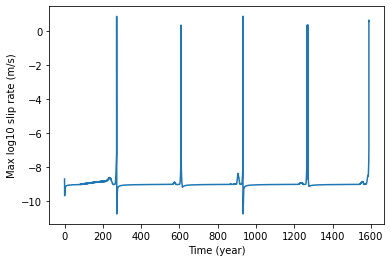

In [50]:
#maximum slip rate vs time 
jobid=0
dd=np.loadtxt('monitor'+str(jobid)+'.dat')
yr=365*24*3600
plt.plot(dd[:,1]/yr,dd[:,2])
plt.xlabel('Time (year)')
plt.ylabel('Max log10 slip rate (m/s)')

Text(0, 0.5, 'Average slip (m)')

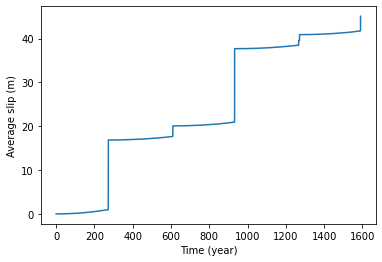

In [51]:
#average slip vs time 
jobid=0
dd=np.loadtxt('monitor'+str(jobid)+'.dat')
yr=365*24*3600
plt.plot(dd[:,1]/yr,dd[:,3])
plt.xlabel('Time (year)')
plt.ylabel('Average slip (m)')

Text(0, 0.5, 'Average friction')

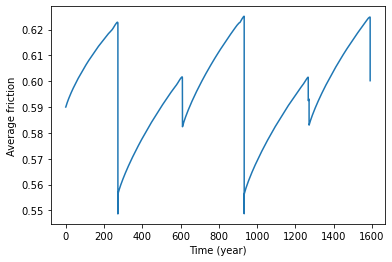

In [52]:
#average friction vs time 
jobid=0
dd=np.loadtxt('monitor'+str(jobid)+'.dat')
yr=365*24*3600
plt.plot(dd[:,1]/yr,dd[:,4])
plt.xlabel('Time (year)')
plt.ylabel('Average friction')

Text(0, 0.5, 'log10 slip rate (m/s)')

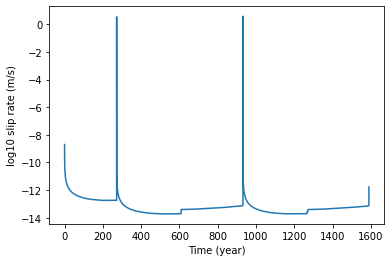

In [55]:
#slip rate vs time at i=500 (loc)
jobid=0
dd=np.loadtxt('local'+str(jobid)+'-500.dat')
yr=365*24*3600
plt.plot(dd[:,1]/yr,dd[:,2])
plt.xlabel('Time (year)')
plt.ylabel('log10 slip rate (m/s)')

Following only works for single core simulations

Text(0, 0.5, 'slip rate (m/s)')

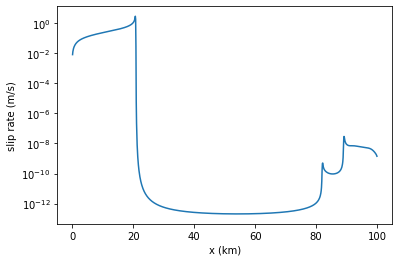

In [49]:
#snapshot for slip velocity
jobid=0
coord=np.loadtxt('xyz'+str(jobid)+'_0.dat')
x=coord[:,0]
ncell=len(x)

fp = open('vel'+ str(jobid) +'_0.dat','rb')
ary = np.fromfile(fp, np.float64, -1)
fp.close()
nt=int(ary.shape[0]/ncell)
vel=ary.reshape(nt,ncell)

plt.yscale('log')
plt.plot(x,vel[10,:])
plt.xlabel('x (km)')
plt.ylabel('slip rate (m/s)')

/tmp/ipykernel_1232386/3934534993.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x,y,d,vmin=-12,vmax=0)


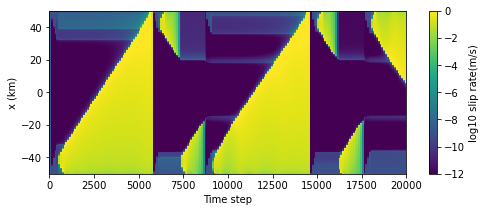

In [48]:
#space time step plot for velocity
jobid=0

coord=np.loadtxt('xyz'+str(jobid)+'_0.dat')
x=coord[:,0]
dx=x[1]-x[0]
ncell=len(x)
fp = open('vel'+ str(jobid) +'_0.dat','rb')
ary = np.fromfile(fp, np.float64, -1)
fp.close()

nt=int(ary.shape[0]/ncell)
d=ary[:nt*ncell].reshape(nt,ncell)
d=ary.reshape(nt,ncell)
d=d.T
d=np.log10(d)

y=np.linspace(-0.5*dx*ncell,0.5*dx*ncell,ncell)
x=np.arange(0,nt,1)
x=x*100 #interval

plt.figure(figsize=(8,3))
plt.pcolormesh(x,y,d,vmin=-12,vmax=0)
plt.xlabel('Time step')
plt.ylabel('x (km)')
plt.colorbar(label='log10 slip rate(m/s)')

Text(0, 0.5, 'slip (m)')

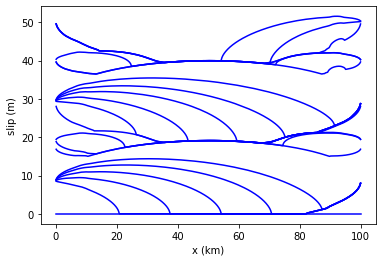

In [46]:
#cumulative slip distribution
jobid=0
coord=np.loadtxt('xyz'+str(jobid)+'_0.dat')
x=coord[:,0]
dx=x[1]-x[0]
ncell=len(x)

fp = open('slip'+ str(jobid) +'_0.dat','rb')
ary = np.fromfile(fp, np.float64, -1)
fp.close()
nt=int(len(ary)/ncell)
d=ary[:nt*ncell].reshape(nt,ncell)
d=d.T

p=10 #interval
for i in range(nt):
    if np.mod(i,p)==0:
        plt.plot(x,d[:,i],c="b")
plt.xlabel('x (km)')
plt.ylabel('slip (m)')